# 디렉토리, 라이브러리, 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import joblib
import matplotlib.pyplot as plt

from imblearn.over_sampling import BorderlineSMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 디렉토리 설정 

In [2]:
os.chdir('C:\\Users\\User\\Desktop\\[21여름] 방학세미나\\2팀 제출')
os.getcwd()

'C:\\Users\\User\\Desktop\\[21여름] 방학세미나\\2팀 제출'

### 데이터 불러오기

In [3]:
train = pd.read_csv('train.csv')

# EDA

### 데이터 구조 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 42.9 MB


Columns = 201, Row = 28000

### 결측치 수 확인

In [5]:
train.isnull().sum()

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

결측치가 없음을 확인!

### 데이터 불균형 확인

* 파이 그래프로 불균형 확인

([<matplotlib.patches.Wedge at 0x15f9a66ec70>,
 [Text(-1.2981490335505972, 0.0693475788449088, '0'),
  Text(1.098433800366684, -0.05867866913968059, '1')],
 [Text(-0.7988609437234444, 0.04267543313532848, '90.0%'),
  Text(0.5991457092909185, -0.032006546803462134, '10.0%')])

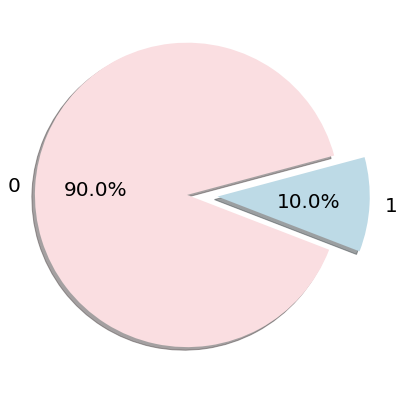

In [6]:
train_count = train['target'].value_counts()
train_count = pd.DataFrame(train_count)
train_count
plt.figure(figsize=(7,7))
plt.pie(train_count['target'], labels=train_count.index.values, autopct='%.1f%%',
       shadow=True,startangle=15,colors=(['#FADEE1','#BDDAE6']),explode=([0.2,0]),textprops={'fontsize': 20})

# 데이터 전처리

### Borderline_SMOTE

* 불균형 데이터 처리 전

<BarContainer object of 2 artists>

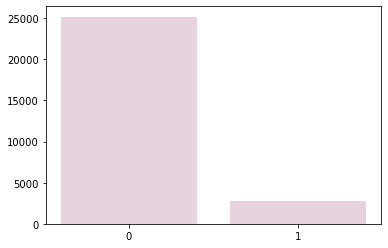

In [7]:
plt.bar(np.arange(2), train['target'].value_counts(), tick_label = ['0','1'],
        color='#CEA8BB',alpha=0.5)

* 데이터 타겟 변수로 나눠주기

In [8]:
train_y = train['target']
train_x = train.drop(['target'], axis = 1)

* 불균형 데이터 처리 하기
* random_state=0으로 고정

<BarContainer object of 2 artists>

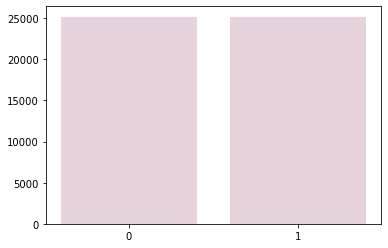

In [9]:
bsmote = BorderlineSMOTE(random_state = 916, kind = 'borderline-1')
X_res, y_res = bsmote.fit_resample(train_x, train_y) #Borderline_Smote 적용

train = pd.concat([X_res, y_res], axis = 1) #다시 하나의 데이터로 합쳐주기

plt.bar(np.arange(2), train['target'].value_counts(), tick_label = ['0','1'],
        color='#CEA8BB',alpha=0.5)

### PCA (Principal Component Analysis)

* 차원축소 (시간 복잡도 & 공간 복잡도를 줄이기 위해)

In [10]:
train_y = train['target']
train_x = train.drop('target', axis = 1)

* 표준화 처리

In [11]:
scale = StandardScaler().fit(train_x)
scaled_x = scale.transform(train_x)

* 95%의 분산 설명을 목표로 차원 축소
* n_components=0.95로 설정

In [12]:
pca = PCA(n_components=0.95 , random_state = 0)
PCA = pca.fit(scaled_x)

* 줄어든 개수 확인

In [13]:
features_pca = PCA.transform(scaled_x)

print("Original:", scaled_x.shape[1])
print("Final:", features_pca.shape[1])

Original: 200
Final: 187


* test set을 위한 모델 저장 (Scale & PCA)

In [14]:
joblib.dump(scale, 'standard.pkl')
joblib.dump(PCA, 'pca.pkl')

['pca.pkl']

* X변수와 y변수로 분리된 데이터를 다시 병합한 후 저장해주었습니다.

In [15]:
train_x = pd.DataFrame(features_pca)
train = pd.concat([train_x,train_y],axis=1)

train.to_csv('train_pcaborder.csv', header = True, index = False)